Group 121:
* Juan Manuel Rodriguez
* Vladyslav Horbatenko
* Aryan Mirzazadeh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_heart = pd.read_csv(
    "https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data",
    sep=",",
    header=0,
    index_col=0,
)
columns_ordered = [
    "sbp",
    "ldl",
    "adiposity",
    "obesity",
    "typea",
    "age",
    "tobacco",
    "alcohol",
    "famhist",
    "chd",
]
missing = [c for c in columns_ordered if c not in df_heart.columns]
if missing:
    raise KeyError(f"Missing columns in df_heart: {missing}")

df_heart = df_heart[columns_ordered]
df_heart.head()

,sbp,ldl,adiposity,obesity,typea,age,tobacco,alcohol,famhist,chd
row.names,,,,,,,,,,
1,160,5.73,23.11,25.30,49,52,12.00,97.20,Present,1
2,144,4.41,28.61,28.87,55,63,0.01,2.06,Absent,1
3,118,3.48,32.28,29.14,52,46,0.08,3.81,Present,0
4,170,6.41,38.03,31.99,51,58,7.50,24.26,Present,1
5,134,3.50,27.78,25.99,60,49,13.60,57.34,Present,1


In [3]:
df_heart["age"].max()

np.int64(64)

In [4]:
df_heart.alcohol.describe()

count    462.000000
mean      17.044394
std       24.481059
min        0.000000
25%        0.510000
50%        7.510000
75%       23.892500
max      147.190000
Name: alcohol, dtype: float64

<Axes: >

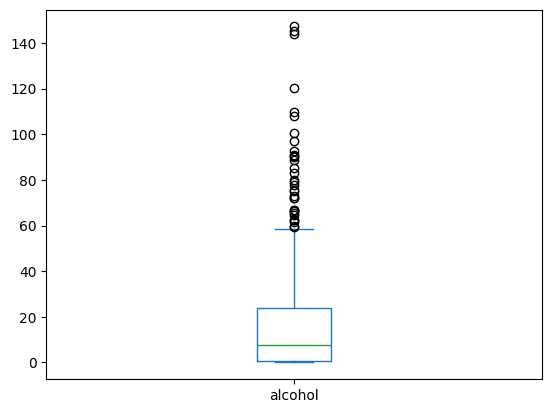

In [5]:
# sbp
# tobacco
# ldl
# adiposity
# famhist
# typea
# obesity
# alcohol
# age
# chd
df_heart["alcohol"].plot(kind="box")


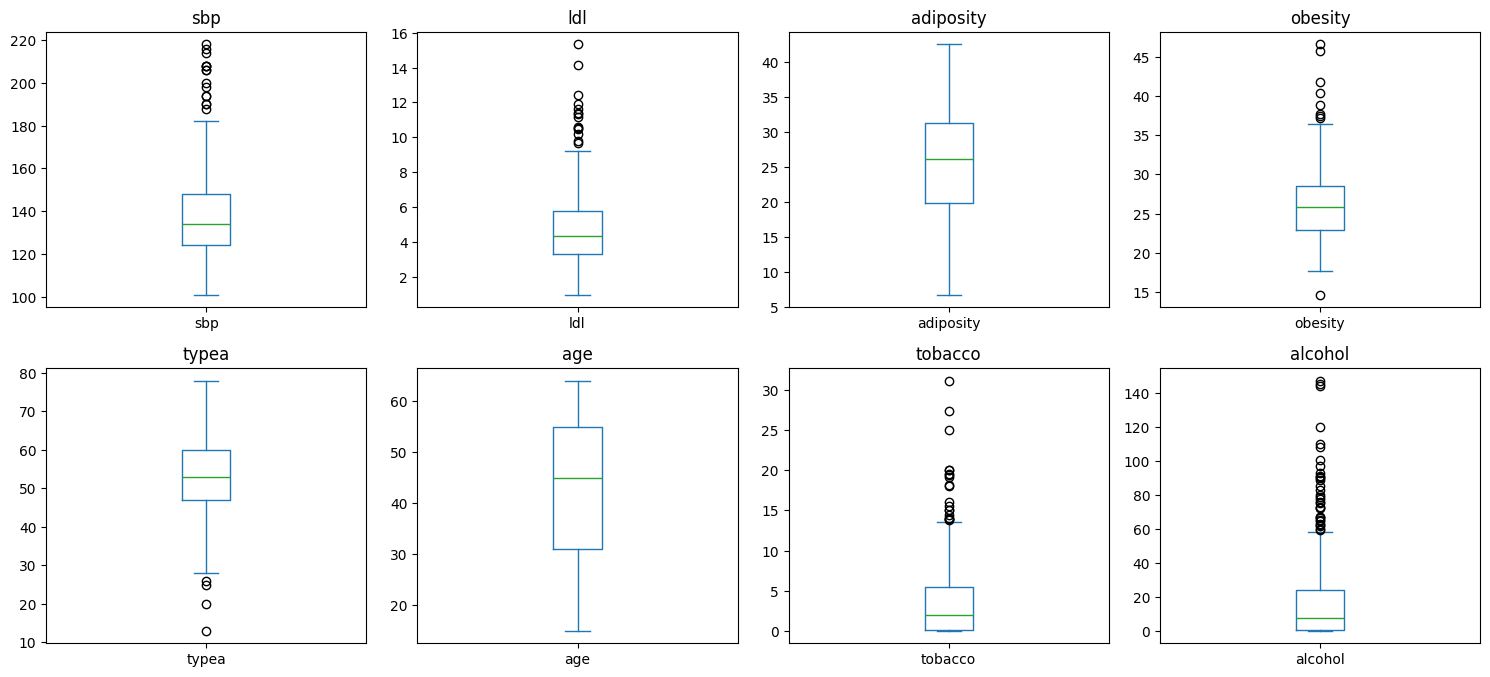

In [6]:
# sbp
# tobacco
# ldl
# adiposity
# famhist
# typea
# obesity
# alcohol
# age
# chd
df_heart_copy = df_heart.drop(columns=["famhist", "chd"])

n_features = len(df_heart_copy.columns)
fig, axes = plt.subplots(nrows=(n_features // 3) + 1, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df_heart_copy.columns):
    df_heart_copy[col].plot(kind="box", ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

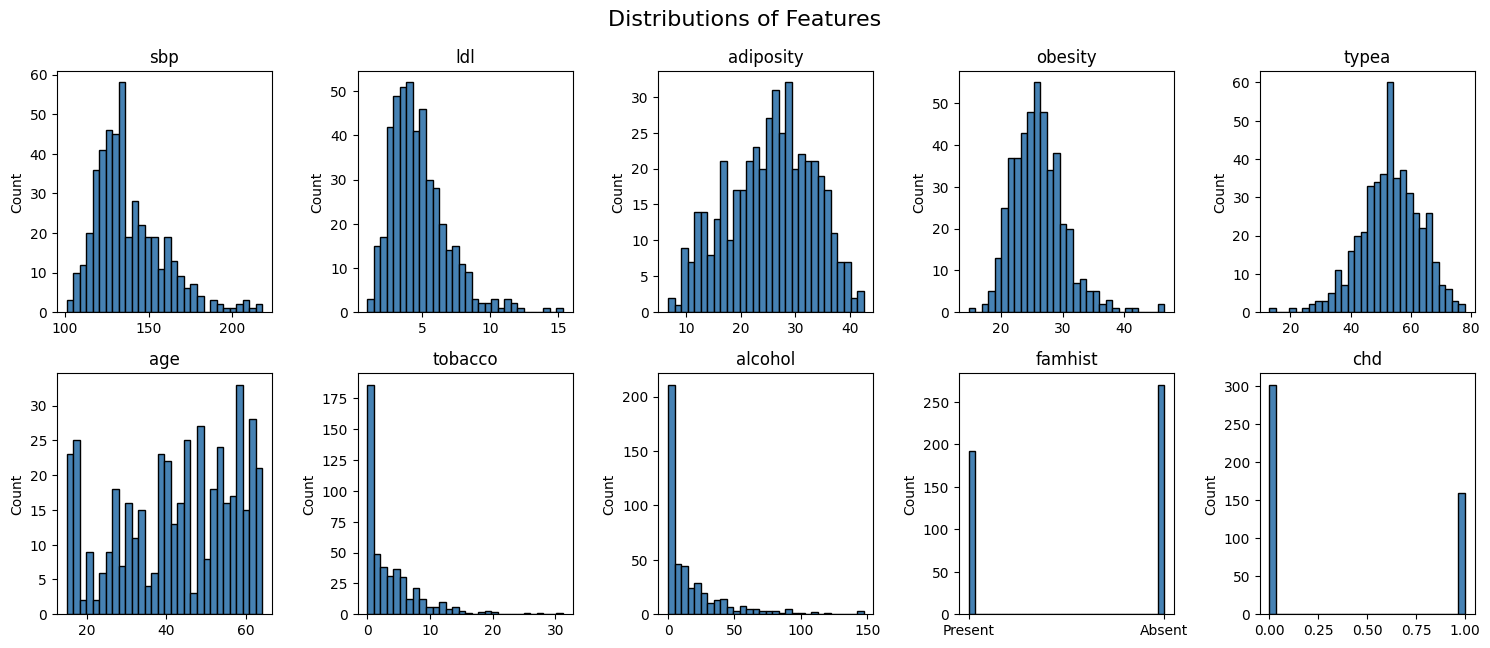

In [7]:
import matplotlib.pyplot as plt

# Number of features
n_features = df_heart.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=(n_features // 3) + 1, ncols=5, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df_heart.columns):
    axes[i].hist(df_heart[col], bins=30, color="steelblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_ylabel("Count")

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distributions of Features", fontsize=16, y=1.02)
plt.show()


row.names
1      1
2      0
3      1
4      1
5      1
      ..
459    0
460    0
461    0
462    0
463    1
Name: famhist, Length: 462, dtype: int64


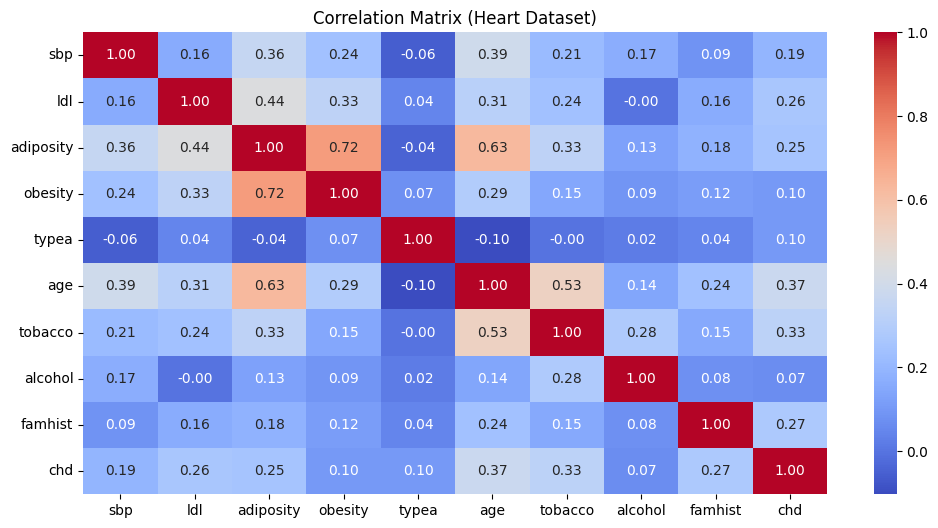

In [8]:
# covariance matrix
df_heart["famhist"] = df_heart["famhist"].map({"Present": 1, "Absent": 0})

columns_to_log_transform = ["tobacco", "alcohol"]
for column in columns_to_log_transform:
    df_heart[column] = np.log1p(df_heart[column])


print(df_heart["famhist"])
# plot as matrix
np.corrcoef(df_heart)
corr_matrix = df_heart.corr()

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Heart Dataset)")
plt.show()


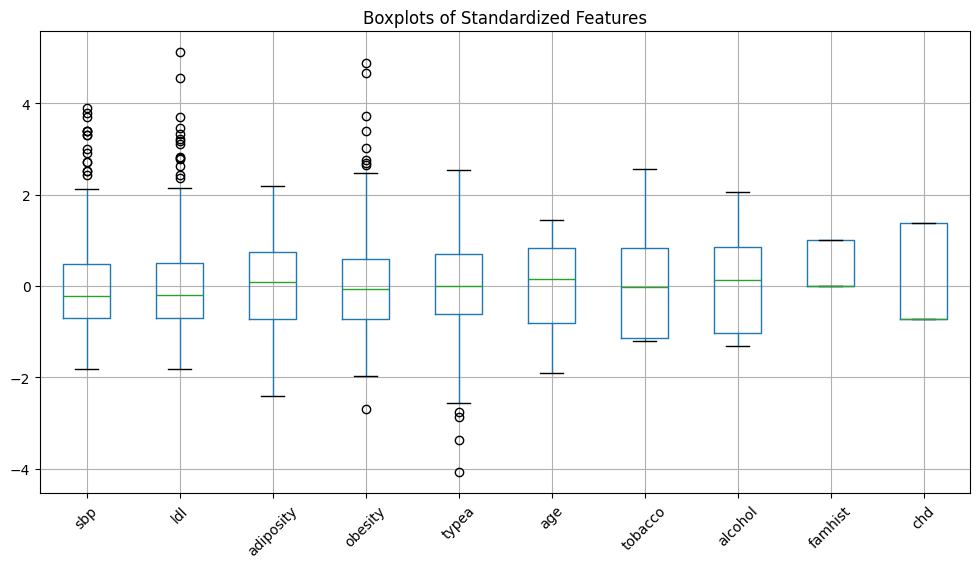

In [9]:
# standarize all columns except famhist
df_heart_standarized = (df_heart - df_heart.mean()) / df_heart.std()
df_heart_standarized["famhist"] = df_heart["famhist"]

plt.figure(figsize=(12, 6))
df_heart_standarized.boxplot(rot=45)
plt.title("Boxplots of Standardized Features")
plt.show()

In [10]:
from sklearn.decomposition import PCA

X = df_heart_standarized.drop(columns=["chd"])
pca = PCA()
pca.fit(X)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


# PCA without CHD

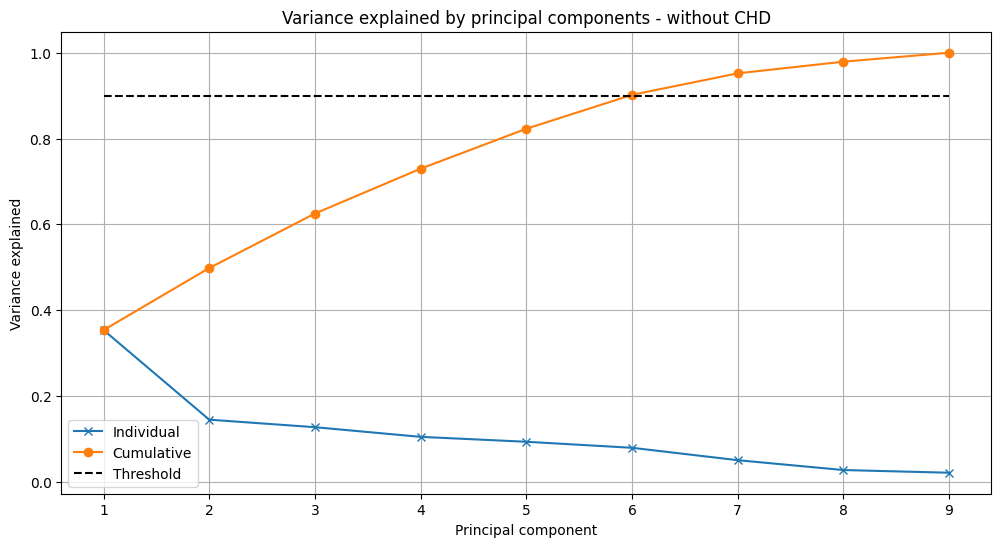

In [11]:
# 90% threshold for variance explained
threshold = 0.9

rho = pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components - without CHD")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

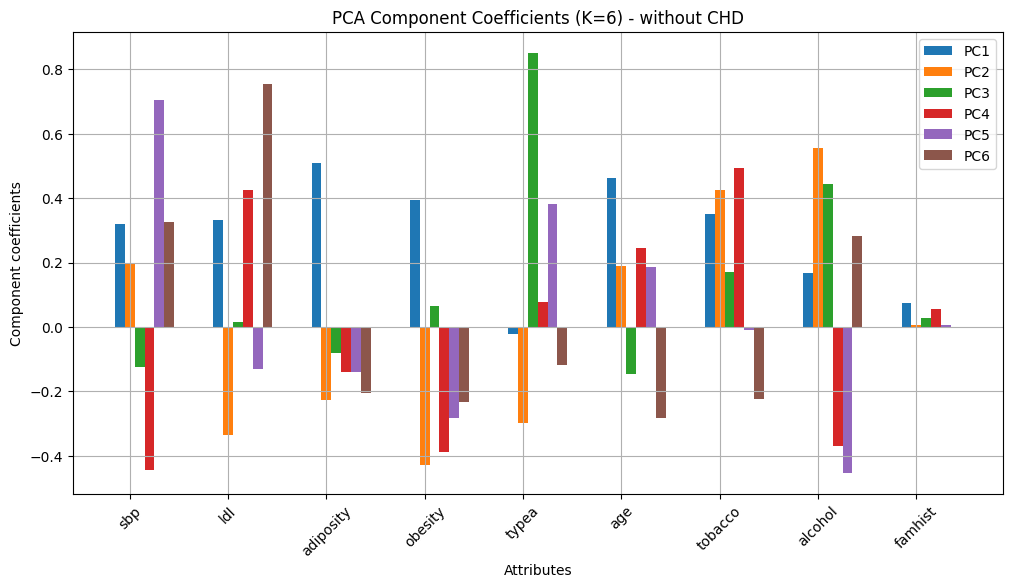

In [12]:
bar_width = 0.1
k_components = 6

# PCA components without CHD
V = pca.components_.T
r = np.arange(1, X.shape[1] + 1)

fig = plt.figure(figsize=(12, 6))
plt.title("PCA Component Coefficients (K=6) - without CHD")
for i, pc in enumerate(V[:, :k_components].T):
    plt.bar(r + i * bar_width, pc, width=bar_width, label=f"PC{i + 1}")
plt.xticks(r + bar_width, X.columns, rotation=45)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.show()

In [13]:
print("cumulative: ", np.cumsum(pca.explained_variance_ratio_))
print("explained: ", pca.explained_variance_ratio_)

cumulative:  [0.35347554 0.49806332 0.62509733 0.72962468 0.82271496 0.90175246
 0.95191102 0.97908457 1.        ]
explained:  [0.35347554 0.14458778 0.12703401 0.10452736 0.09309027 0.0790375
 0.05015856 0.02717355 0.02091543]


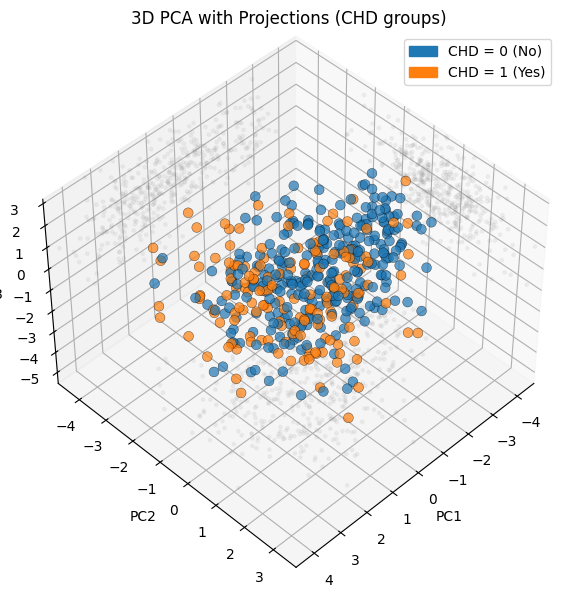

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

# Standardize features (excluding target y)
X = df_heart.drop(columns=["chd"])
y = df_heart["chd"]
X_scaled = StandardScaler().fit_transform(X)

# PCA to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Colors for binary CHD
colors = ["tab:blue", "tab:orange"]  # 0 = No, 1 = Yes
sc = ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=y.map({0: colors[0], 1: colors[1]}),
    alpha=0.7,
    s=50,
    edgecolor="k",
    linewidth=0.3,
)

# Projections with smaller, lighter markers
ax.scatter(
    X_pca[:, 0], X_pca[:, 1], zs=-5, zdir="z", c="grey", alpha=0.08, s=6, marker="o"
)  # PC1–PC2 plane
ax.scatter(
    X_pca[:, 0], zs=-5, ys=X_pca[:, 2], zdir="y", c="grey", alpha=0.08, s=6, marker="o"
)  # PC1–PC3 plane
ax.scatter(
    zs=-5,
    xs=X_pca[:, 1],
    ys=X_pca[:, 2],
    zdir="x",
    c="grey",
    alpha=0.08,
    s=6,
    marker="o",
)  # PC2–PC3 plane

# Labels & aesthetics
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA with Projections (CHD groups)")

# Legend instead of colorbar
legend_handles = [
    mpatches.Patch(color=colors[0], label="CHD = 0 (No)"),
    mpatches.Patch(color=colors[1], label="CHD = 1 (Yes)"),
]
ax.legend(handles=legend_handles, loc="upper right")

# Rotate view so projections are visible
ax.view_init(elev=45, azim=45)  # adjust angles if needed

plt.show()


# PCA Analysis with SBP (Systolic Blood Pressure)

In [15]:
# data for PCA with SBP color coding
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

# standard features (excluding target y and sbp for color coding)
X = df_heart.drop(columns=["chd", "sbp"])
y = df_heart["chd"]
sbp_values = df_heart["sbp"]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(f"SBP range: {sbp_values.min():.1f} - {sbp_values.max():.1f}")
print(f"SBP mean: {sbp_values.mean():.1f}")
print(f"SBP std: {sbp_values.std():.1f}")


SBP range: 101.0 - 218.0
SBP mean: 138.3
SBP std: 20.5


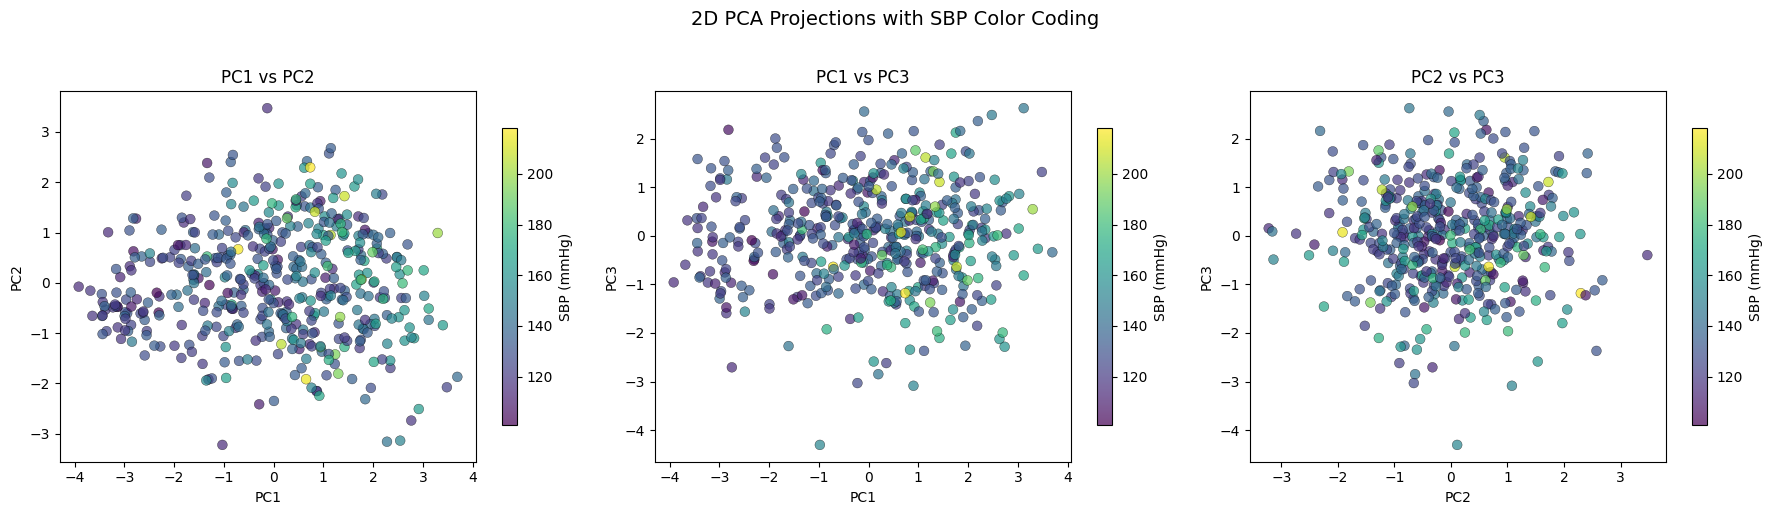

In [16]:
# 2D PCA projections with SBP color coding
pc_pairs = [(0, 1), (0, 2), (1, 2)]
titles = ["PC1 vs PC2", "PC1 vs PC3", "PC2 vs PC3"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (i, j), title in zip(axes, pc_pairs, titles):
    sc = ax.scatter(X_pca[:, i], X_pca[:, j],
                   c=sbp_values, cmap='viridis',
                   alpha=0.7, s=50, edgecolor="k", linewidth=0.3)
    ax.set_xlabel(f"PC{i+1}")
    ax.set_ylabel(f"PC{j+1}")
    ax.set_title(title)
    
    # colorbar for each subplot
    cbar = plt.colorbar(sc, ax=ax, shrink=0.8)
    cbar.set_label('SBP (mmHg)')

plt.suptitle("2D PCA Projections with SBP Color Coding", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [17]:

# categories for blod preasure
sbp_ranges = {
    'Normal': (0, 120),
    'Elevated': (120, 130), 
    'High Stage 1': (130, 140),
    'High Stage 2': (140, 180),
    'Crisis': (180, 300)
}

# adding categorical labels
sbp_categories = []
for value in sbp_values:
    for category, (min_val, max_val) in sbp_ranges.items():
        if min_val <= value < max_val:
            sbp_categories.append(category)
            break
    else:
        sbp_categories.append('Crisis')

sbp_categories = np.array(sbp_categories)

# samples in each category
unique_categories, counts = np.unique(sbp_categories, return_counts=True)
print("SBP Category Distribution:")
for cat, count in zip(unique_categories, counts):
    print(f"{cat}: {count} samples")


SBP Category Distribution:
Crisis: 19 samples
Elevated: 102 samples
High Stage 1: 121 samples
High Stage 2: 153 samples
Normal: 67 samples


In [18]:
category_colors = {
    'Normal': 'green',
    'Elevated': 'yellow', 
    'High Stage 1': 'orange',
    'High Stage 2': 'red',
    'Crisis': 'darkred'
}


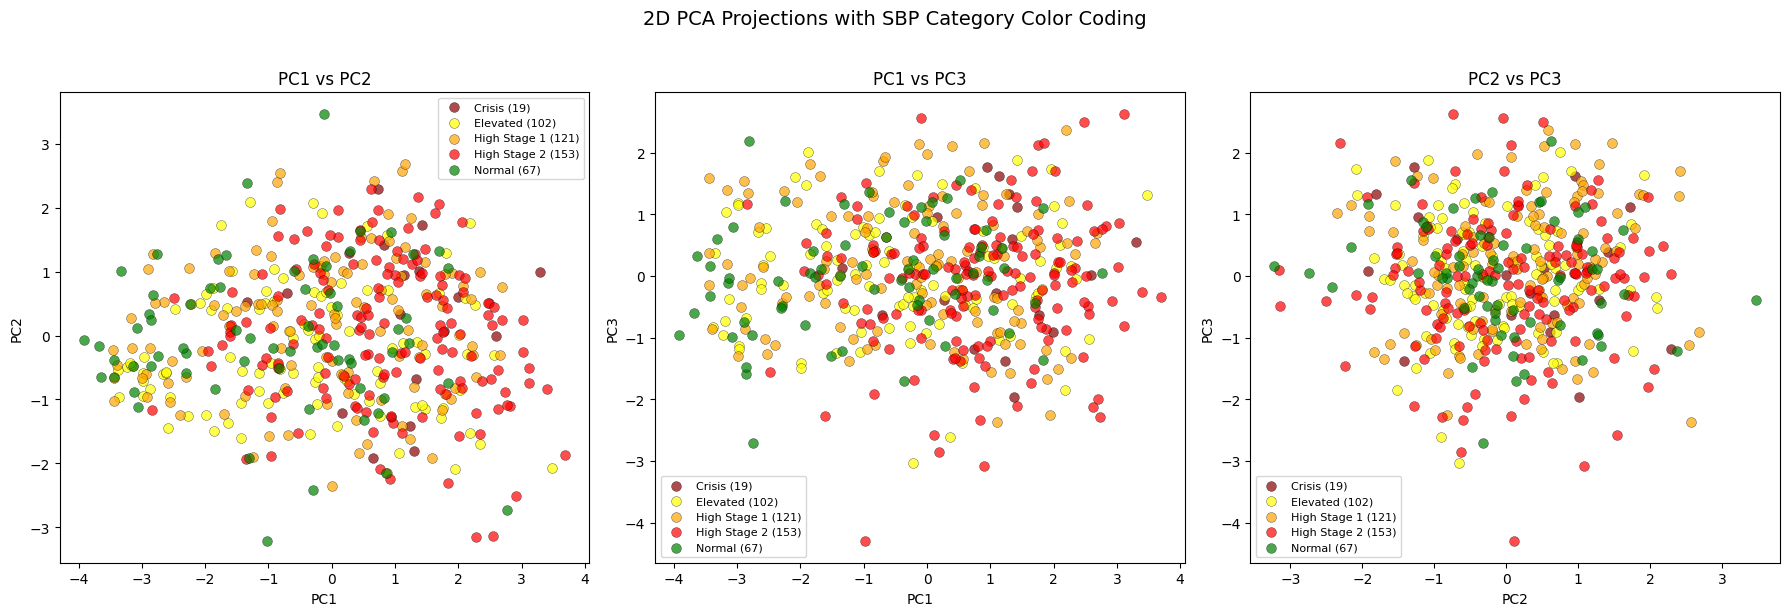

In [19]:
# 2D PCA projections with SBP category color coding
pc_pairs = [(0, 1), (0, 2), (1, 2)]
titles = ["PC1 vs PC2", "PC1 vs PC3", "PC2 vs PC3"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (i, j), title in zip(axes, pc_pairs, titles):
    for category in unique_categories:
        mask = sbp_categories == category
        if np.any(mask):
            ax.scatter(X_pca[mask, i], X_pca[mask, j],
                      c=category_colors[category], 
                      label=f"{category} ({np.sum(mask)})",
                      alpha=0.7, s=50, edgecolor="k", linewidth=0.3)
    
    ax.set_xlabel(f"PC{i+1}")
    ax.set_ylabel(f"PC{j+1}")
    ax.set_title(title)
    ax.legend(fontsize=8)

plt.suptitle("2D PCA Projections with SBP Category Color Coding", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


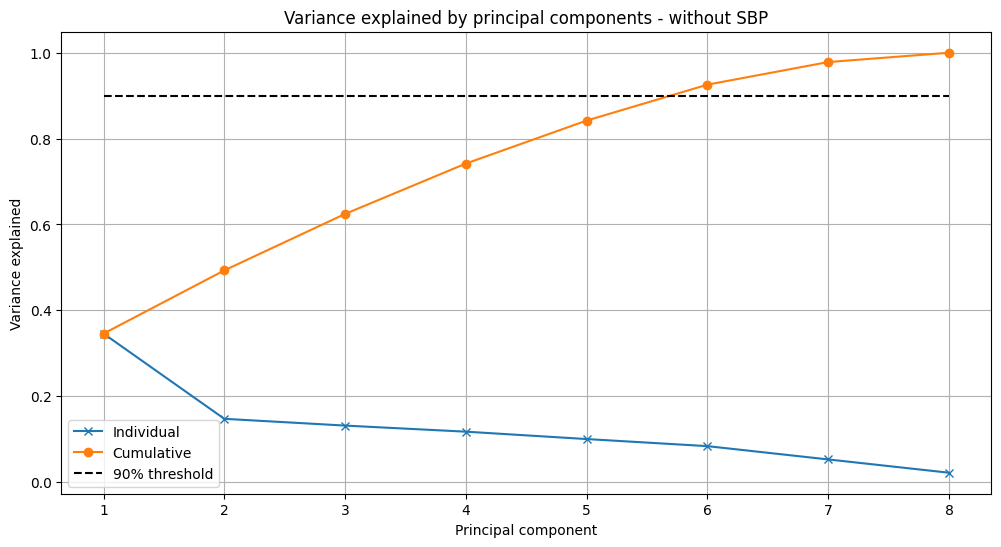

In [20]:
# explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, "x-", label="Individual")
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), "o-", label="Cumulative")
plt.plot([1, len(pca.explained_variance_ratio_)], [0.9, 0.9], "k--", label="90% threshold")
plt.title("Variance explained by principal components - without SBP")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend()
plt.grid()
plt.show()


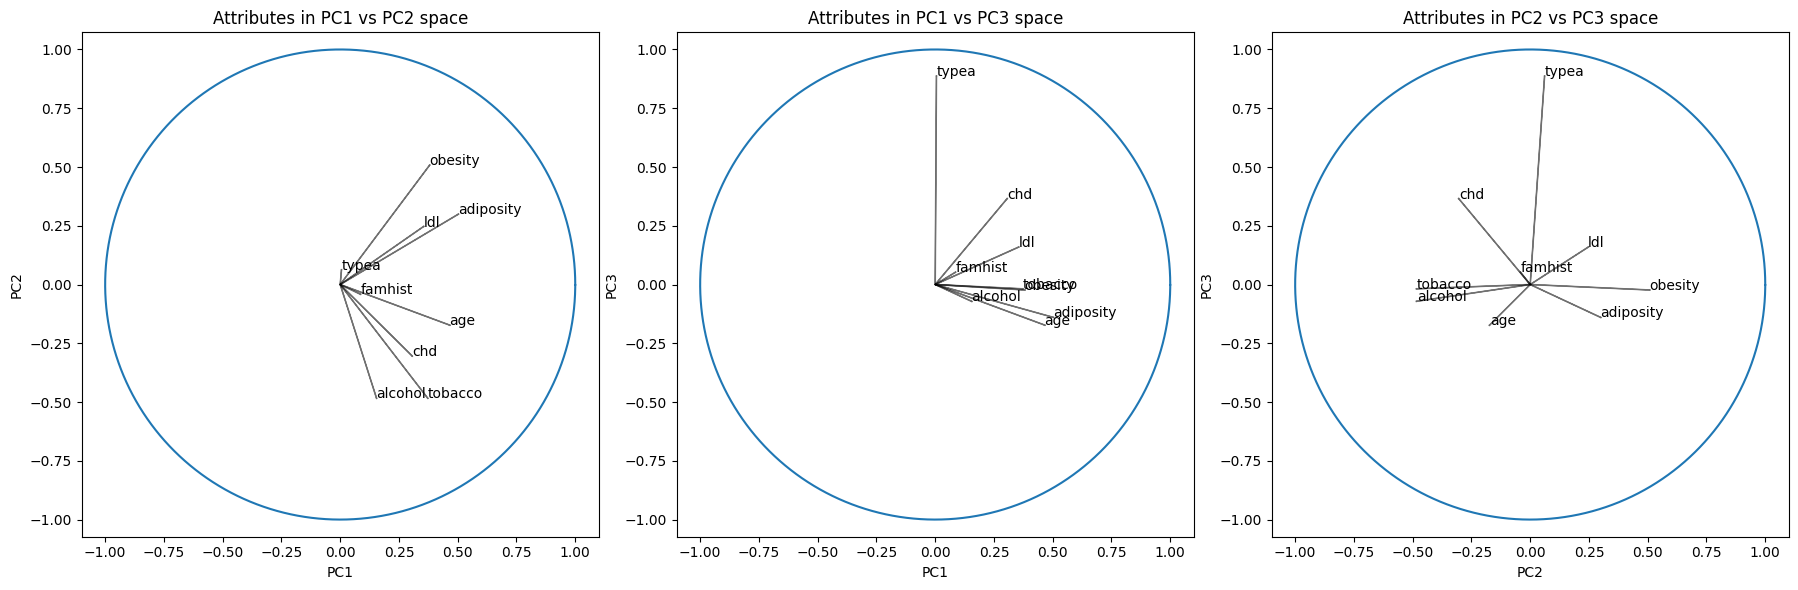

In [21]:
pc_pairs = [(0, 1), (0, 2), (1, 2)]  # (PC1,PC2), (PC1,PC3), (PC2,PC3)

X = df_heart_standarized.drop(columns=["sbp"])
pca = PCA()
B = pca.fit_transform(X)
V = pca.components_.T

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (pc_x, pc_y) in enumerate(pc_pairs):
    ax = axes[i]
    ax.set_title(f"Attributes in PC{pc_x + 1} vs PC{pc_y + 1} space")
    for attr_idx, attr_name in enumerate(X.columns):
        ax.arrow(0, 0, V[attr_idx, pc_x], V[attr_idx, pc_y], color="black", alpha=0.5)
        ax.text(V[attr_idx, pc_x], V[attr_idx, pc_y], attr_name)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_xlabel(f"PC{pc_x + 1}")
    ax.set_ylabel(f"PC{pc_y + 1}")
    ax.grid()
    ax.plot(
        np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01))
    )
    ax.axis("equal")
    ax.grid()

plt.tight_layout()
plt.show()